In [ ]:
import tensorflow as tf 
import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pickle
import random
import numpy as np
import os 
import pandas as pd 
import cv2
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb

In [ ]:
dir= '/content/drive/MyDrive/Data4'
catigoty=["decayed","good"]
ln=[]
#counting our data
for i in catigoty:
 path=os.path.join(dir,i)
 path=os.listdir(path)
 ln.append([len(path),i])
ln

[[278, 'decayed'], [589, 'good']]

In [ ]:
size=[]
for i in catigoty:
 path=os.path.join(dir,i)
 images=gb.glob(pathname= str( path+'/*.jpg'))
 for image in images: 
     im = plt.imread(image)
     size.append(im.shape)

size=pd.Series(size).value_counts().sort_values()

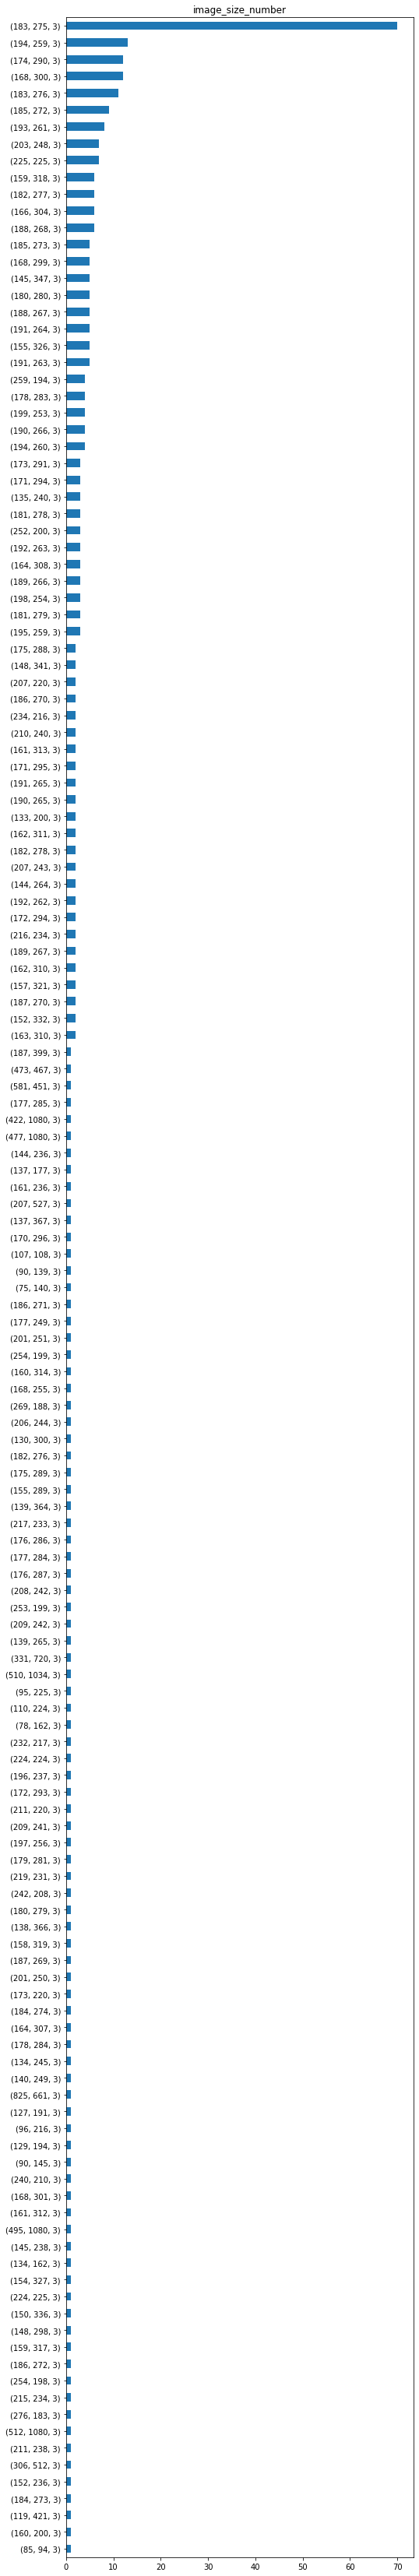

In [ ]:
plt.figure(figsize=(8,60))
size.plot(kind='barh',title='image_size_number')
plt.show()

In [ ]:
data=[]
for i in catigoty:
    path=os.path.join(dir, i)
    lable=catigoty.index(i)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        tooth_image=cv2.imread(img_path,1)
        tooth_image=cv2.cvtColor(tooth_image, cv2.COLOR_BGR2RGB)
        try:
            tooth_image=cv2.resize(tooth_image,(250,250))
            image=np.array(tooth_image)
            data.append([image,lable])
        except Exception as e:
            pass

random.shuffle(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


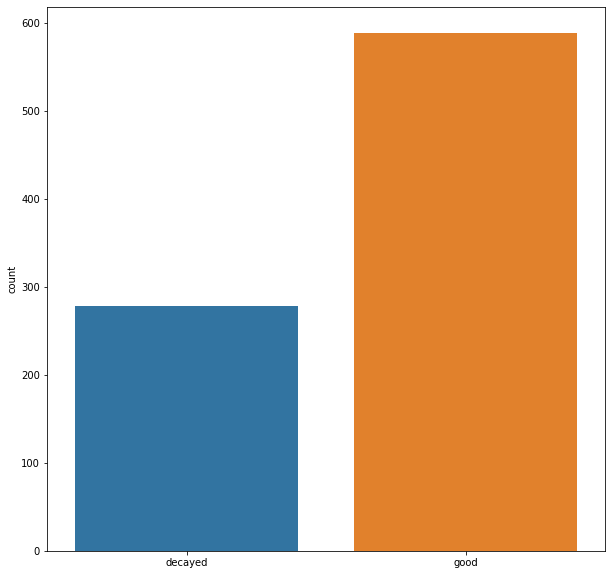

In [ ]:
plt.figure(figsize=(10,10))
p = []
for i , l in data:
    if(l == 0):
      p.append("decayed")
    else:
      p.append("good")
sns.countplot(p)

In [ ]:
X,y=[],[]
for featuers,label in data :
    X.append(featuers)
    y.append(label)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=40,shuffle=True)

In [ ]:
X_train=np.array(X_train)/255.0
X_test=np.array(X_test)/255.0
print("shape",X_train.shape)

shape (693, 250, 250, 3)


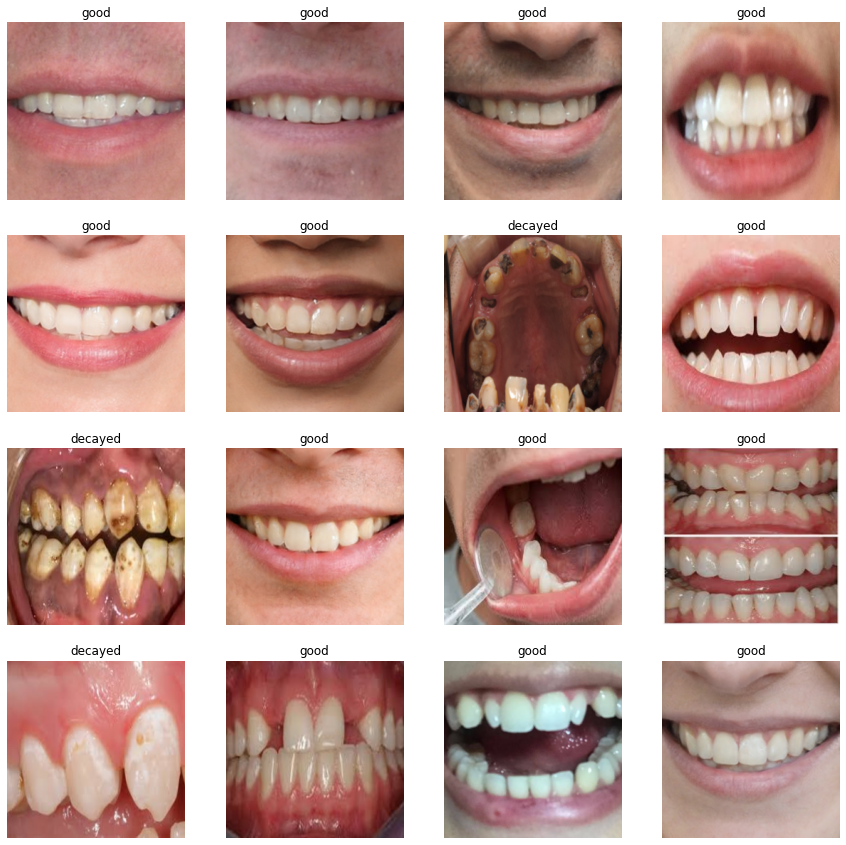

In [ ]:
plt.figure(figsize=(15,15))
for i in range(16):
        ax=plt.subplot(4,4,i+1)
        tooth=X_train[i].reshape(250,250,3)
        plt.imshow(tooth)
        plt.title(catigoty[y_train[i]])
        plt.axis('off')

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train.shape

(693, 250, 250, 3)

In [ ]:
Model=models.Sequential([
                         layers.Conv2D(60,kernel_size=(3,3),activation='relu',input_shape=(250,250,3)), 
                         layers.MaxPool2D(2,2),
                         layers.Conv2D(100,  kernel_size = (3,3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(100,  kernel_size = (3,3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(100, (3, 3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(100, (3, 3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         layers.Flatten(),    
                         layers.Dense(100,activation='relu') ,  
                         layers.Dropout(rate=0.25) ,            
                         layers.Dense(2,activation='softmax') ,    
        ])
Model.build(input_shape=(250,250,3))

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,    
        rotation_range=10,    
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)

datagen.fit(X_train)

In [ ]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 248, 248, 60)      1680      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 124, 124, 60)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 100)     54100     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 100)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 100)       90100     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 100)     

In [ ]:
Model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = Model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=40,
                    verbose=1,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/40
22/22 [==============================] - 10s 418ms/step - loss: 0.6664 - accuracy: 0.6739 - val_loss: 0.6299 - val_accuracy: 0.6954
Epoch 2/40
22/22 [==============================] - 9s 399ms/step - loss: 0.6607 - accuracy: 0.6753 - val_loss: 0.6199 - val_accuracy: 0.6954
Epoch 3/40
22/22 [==============================] - 9s 397ms/step - loss: 0.6570 - accuracy: 0.6753 - val_loss: 0.6001 - val_accuracy: 0.6954
Epoch 4/40
22/22 [==============================] - 9s 405ms/step - loss: 0.6136 - accuracy: 0.6797 - val_loss: 0.5192 - val_accuracy: 0.7701
Epoch 5/40
22/22 [==============================] - 9s 401ms/step - loss: 0.5605 - accuracy: 0.7403 - val_loss: 0.5290 - val_accuracy: 0.7816
Epoch 6/40
22/22 [==============================] - 9s 406ms/step - loss: 0.4835 - accuracy: 0.7605 - val_loss: 0.4538 - val_accuracy: 0.7816
Epoch 7/40
22/22 [==============================] - 9s 401ms/step - loss: 0.4548 - accuracy: 0.7922 - val_loss: 0.4432 - val_accuracy: 0.7471
Epoch

In [ ]:
Model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 43ms/step - loss: 0.2425 - accuracy: 0.9138


[0.24249692261219025, 0.9137930870056152]

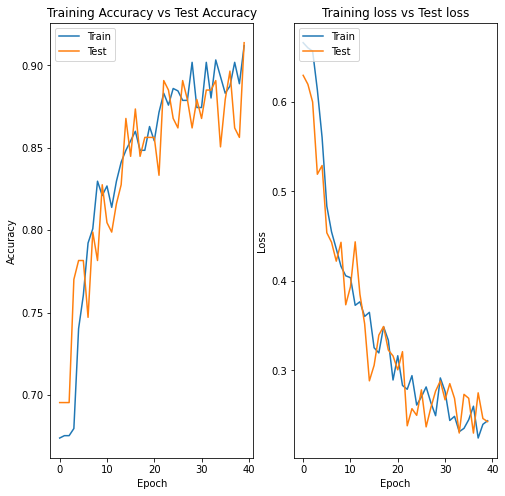

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'],)
plt.title('Training Accuracy vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'],)
plt.title('Training loss vs Test loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
Model.save('alpha_mod.h5')

In [ ]:
saved_model = tf.keras.models.load_model('/content/alpha_mod.h5')

In [ ]:
saved_model.predict(X_test)

array([[3.72806191e-02, 9.62719381e-01],
       [7.65531898e-01, 2.34468147e-01],
       [3.62758189e-01, 6.37241840e-01],
       [1.11559797e-02, 9.88844037e-01],
       [1.87211726e-02, 9.81278777e-01],
       [1.95968058e-02, 9.80403185e-01],
       [5.04502933e-03, 9.94955003e-01],
       [5.73250139e-03, 9.94267523e-01],
       [2.14523599e-02, 9.78547573e-01],
       [8.80071819e-02, 9.11992788e-01],
       [2.38458648e-01, 7.61541367e-01],
       [2.93736998e-02, 9.70626354e-01],
       [2.24649739e-02, 9.77535009e-01],
       [6.53640211e-01, 3.46359819e-01],
       [4.10170585e-01, 5.89829385e-01],
       [1.29694222e-02, 9.87030566e-01],
       [1.64816901e-02, 9.83518362e-01],
       [3.67627561e-01, 6.32372499e-01],
       [3.94740738e-02, 9.60525930e-01],
       [4.69549000e-03, 9.95304585e-01],
       [3.06839228e-01, 6.93160772e-01],
       [2.54631639e-01, 7.45368361e-01],
       [3.22490319e-04, 9.99677539e-01],
       [3.89593512e-01, 6.10406518e-01],
       [4.489895

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmphxjawtad/assets


In [ ]:
with open('alpha_mod.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
predictions = Model.predict(X_test)
y_pred = [np.argmax(probas) for probas in predictions]

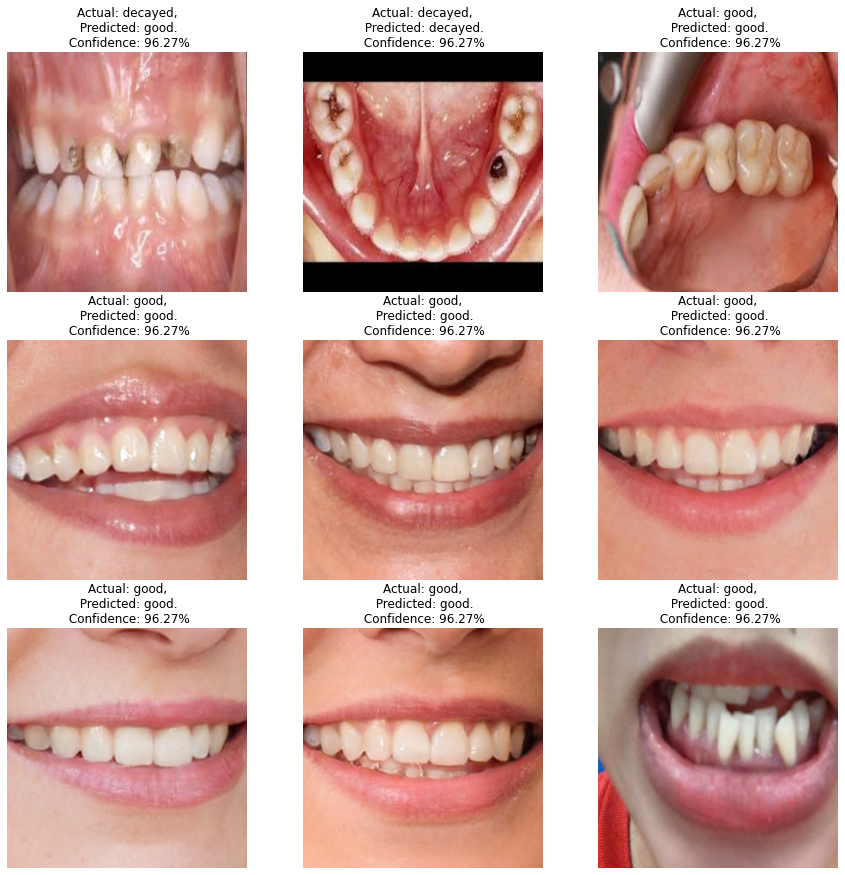

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
        ax=plt.subplot(3,3,i+1)
        brain=X_test[i].reshape(250,250,3)
        confidence = round(100 * (np.max(predictions[0])), 2)
        plt.imshow(brain)
        plt.title(f"Actual: {catigoty[y_test[i]]},\n Predicted: {catigoty[y_pred[i]]}.\n Confidence: {confidence}%")
        plt.axis('off')

In [ ]:
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

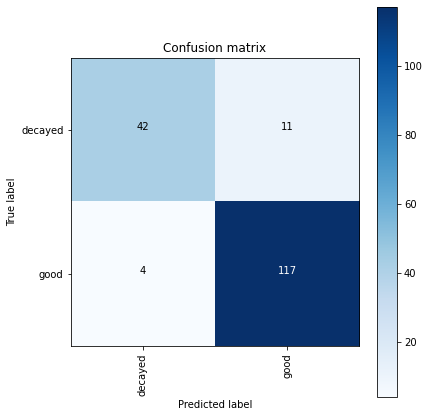

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=catigoty)